In [1]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
scRNA = readRDS('./after_rename.rds')

In [3]:
library(pheatmap)
Idents(scRNA)<- scRNA$orig.ident
av.exp<- AverageExpression(scRNA)$RNA
# av.exp<- av.exp[which(row.names(av.exp)%in% features),]

features=names(tail(sort(apply(av.exp, 1, sd)),3000))
av.exp<- av.exp[which(row.names(av.exp)%in% features),]
av.exp <- cor(av.exp, method= "spearman")


Warning message:
“package ‘pheatmap’ was built under R version 4.2.3”


In [4]:
av.exp

,control,MI14d,MI3d,MI7d
control,1.0000000,0.9044733,0.4488720,0.8086628
MI14d,0.9044733,1.0000000,0.5246707,0.9100646
MI3d,0.4488720,0.5246707,1.0000000,0.6931967
MI7d,0.8086628,0.9100646,0.6931967,1.0000000


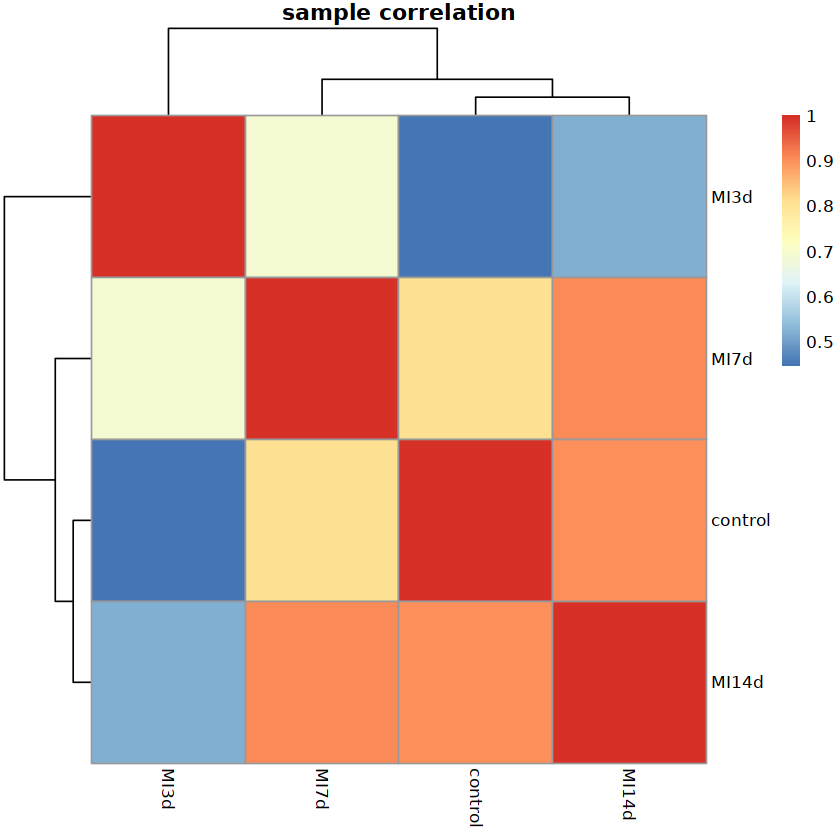

In [5]:
p = pheatmap::pheatmap(av.exp,main = 'sample correlation')

In [6]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [7]:
pdf('sample.cor.pdf')
print(p)
dev.off()

png 
  2

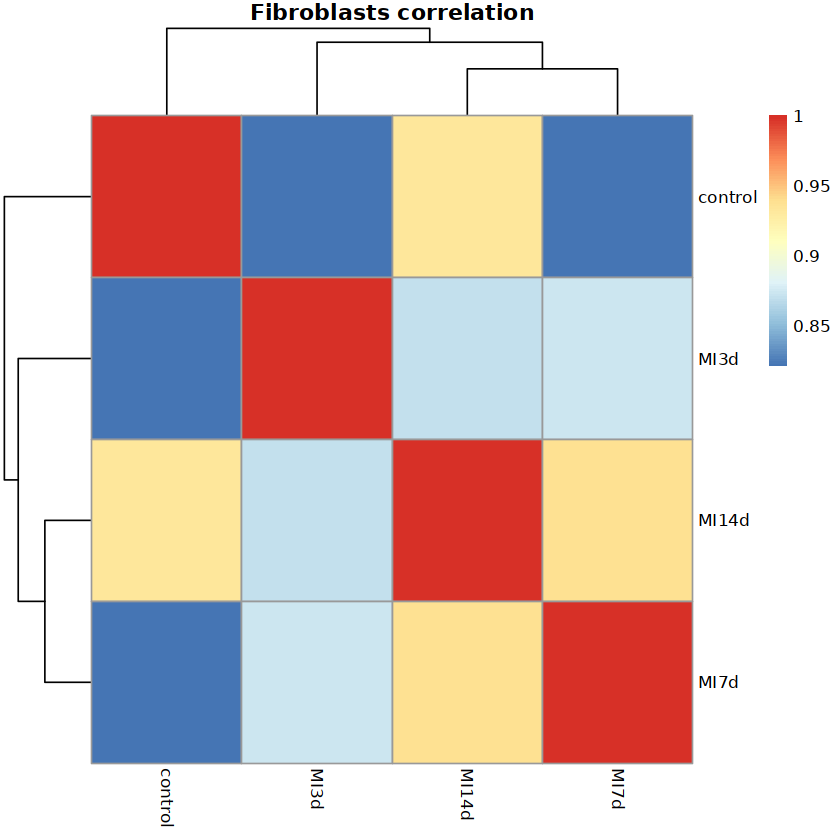

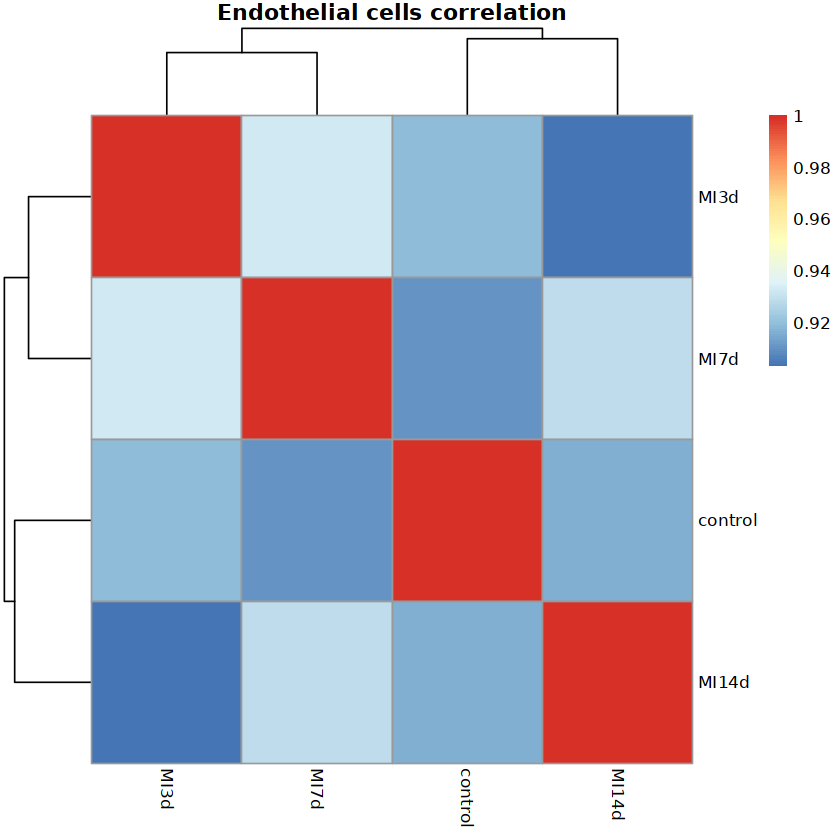

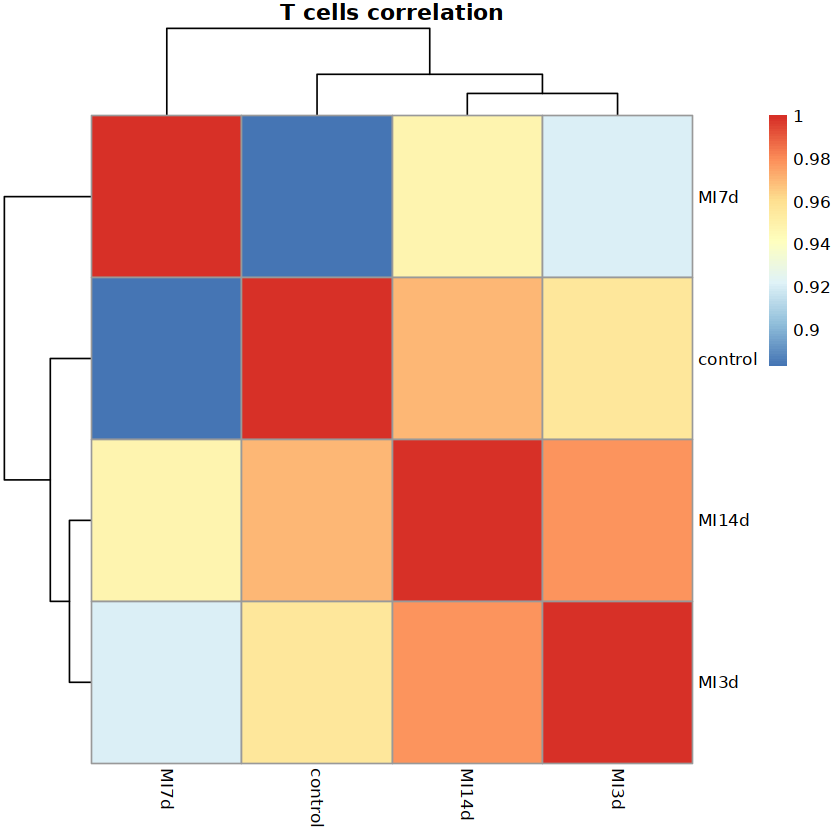

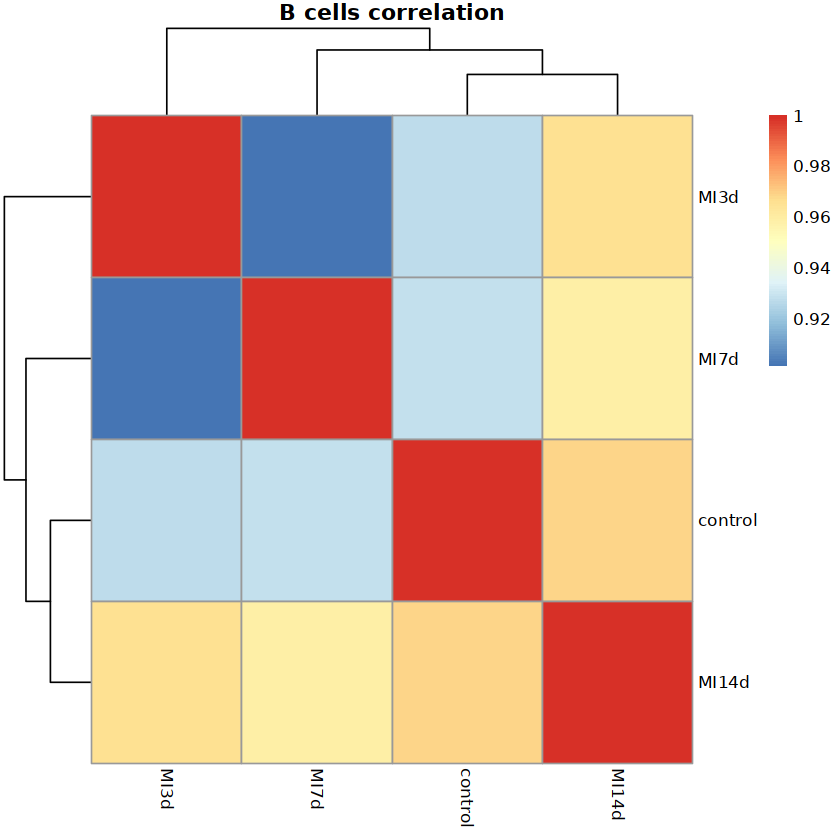

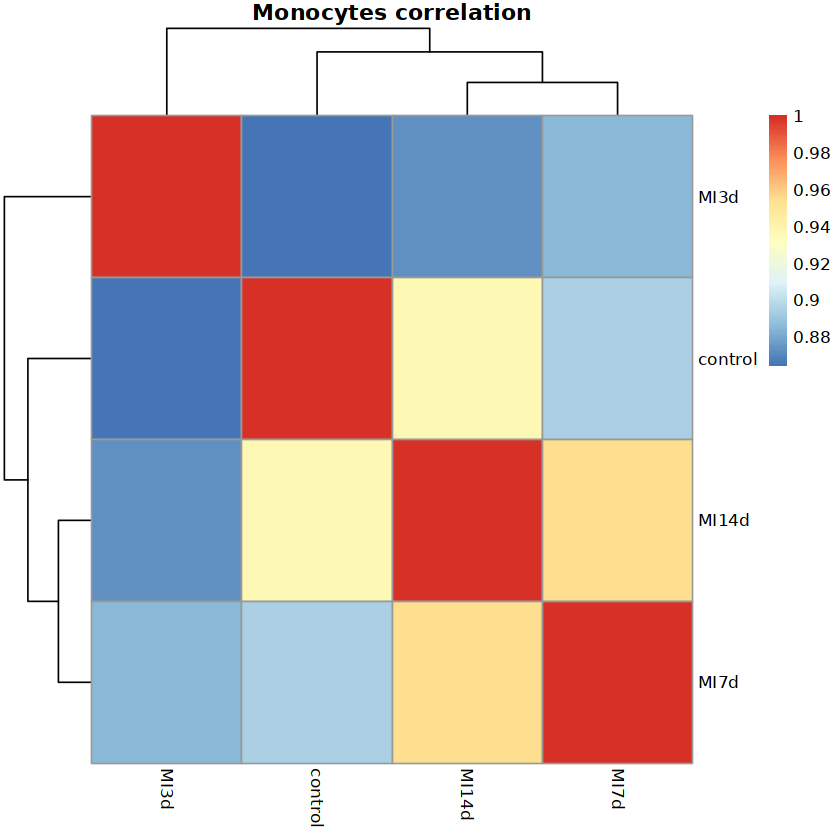

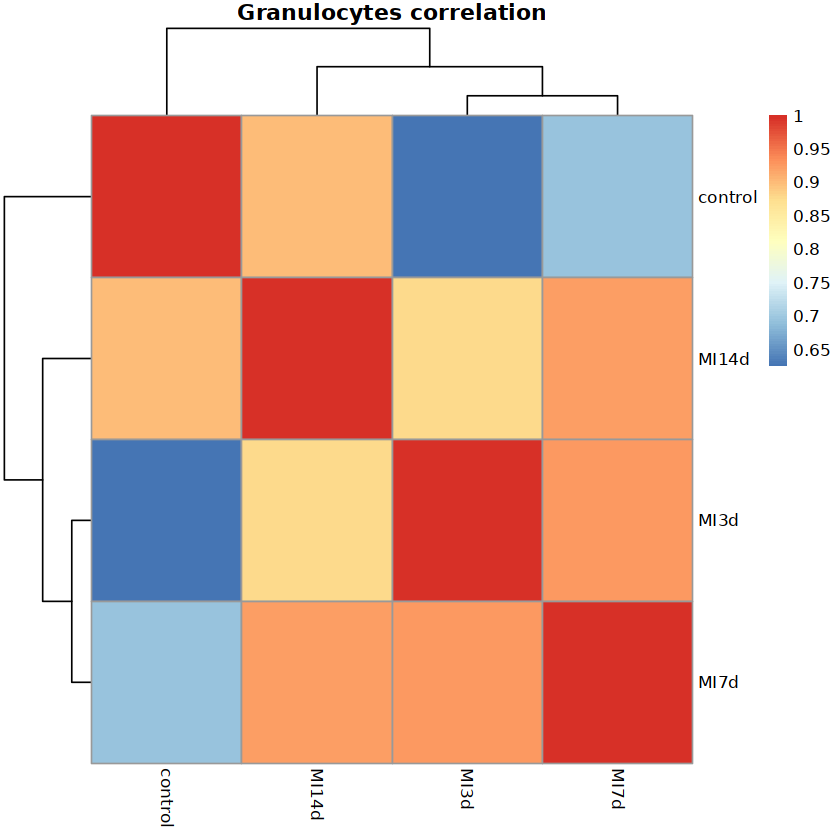

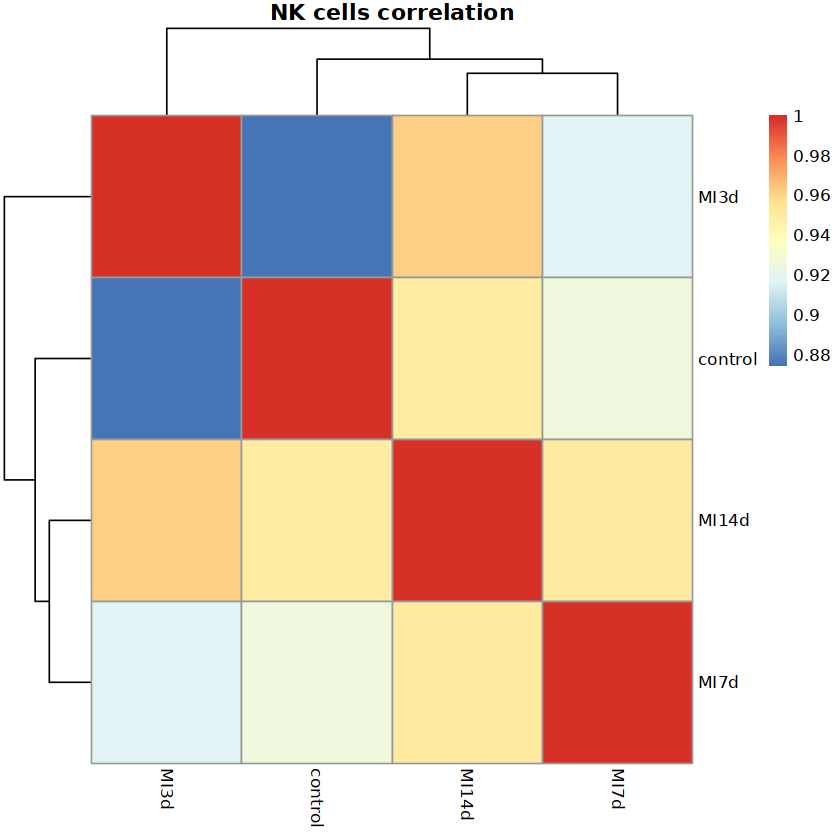

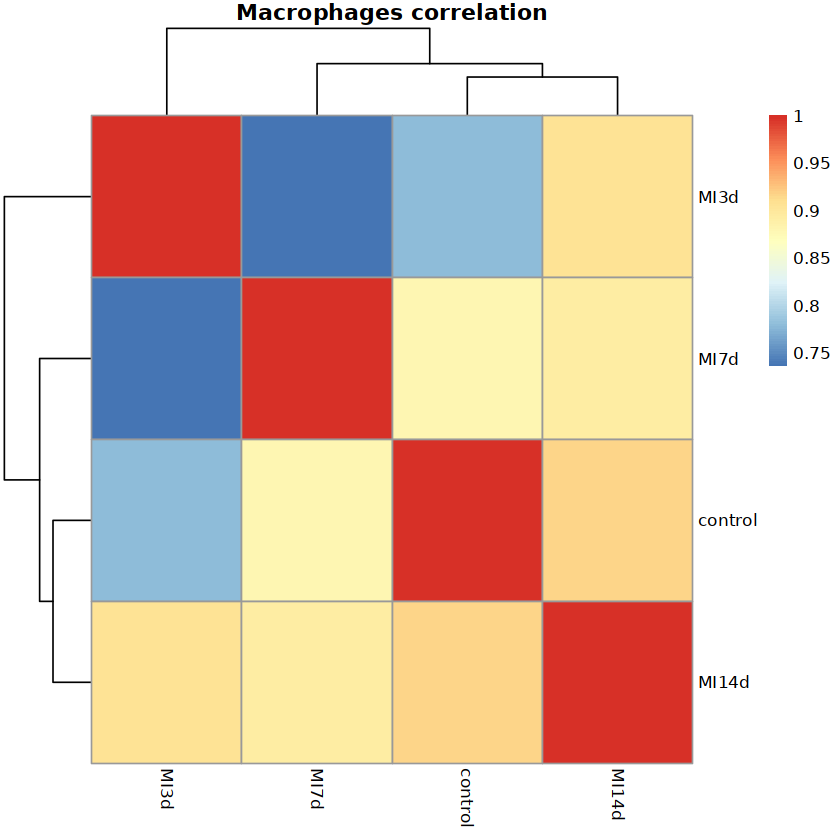

In [8]:
for ( i in unique(scRNA$celltype)){
    Idents(scRNA) = 'celltype'
    scRNA1 = subset(scRNA, subset = celltype  == i)
    
    library(pheatmap)
    Idents(scRNA1)<- scRNA1$orig.ident
    av.exp<- AverageExpression(scRNA1)$RNA
    # av.exp<- av.exp[which(row.names(av.exp)%in% features),]
    
    features=names(tail(sort(apply(av.exp, 1, sd)),3000))
    av.exp<- av.exp[which(row.names(av.exp)%in% features),]
    av.exp <- cor(av.exp, method= "pearson")
    p = pheatmap::pheatmap(av.exp,main = paste0(i,' correlation'))

    pdf(paste0(i,'.cor.pdf'))
    print(p)
    dev.off()
    
    
}

